#Load and Preprocess the data

Data Source:https://www.kaggle.com/datasets/ayanwap7/rice-image-dataset-train-test-split

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Unzip signature-verification-dataset.zip to "/content" directory.
#PLEASE CHANGE THE PATH WHEN RUNNING THIS CODE!!!!!
!unzip -q "/content/drive/MyDrive/2023 Spring DAT565 Deep learning/Deep Learning_Final Project/Rice_Image Classification.zip" -d /content/

In [ ]:
import os
import pandas as pd
#write the test image file name into the excel
# Set the path to the folder you want to get the file names of
folders_path_test = {1:"/content/Rice_Image_Dataset/test/Arborio",2:"/content/Rice_Image_Dataset/test/Basmati",
                3:"/content/Rice_Image_Dataset/test/Ipsala",4:"/content/Rice_Image_Dataset/test/Jasmine",
                5:"/content/Rice_Image_Dataset/test/Karacadag"}


# Loop through each folder and list the file names and classes
file_names = []
classes = []
file_directory=[]
for class_name, folder in folders_path_test.items():
    for file in os.listdir(folder):
        file_names.append(file)
        classes.append(class_name)
        file_directory.append(folder+"/"+file)


# Create a dataframe from the list of file names and classes
df_test = pd.DataFrame({'images': file_names, 'Classes': classes,"file_directory":file_directory})


# Write the DataFrame to an Excel file
df_test.to_excel('test_image.xlsx', index=False)


In [ ]:
#write the test image file name into the excel
# Set the path to the folder you want to get the file names of
folders_path_train = {1:"/content/Rice_Image_Dataset/train/Arborio",2:"/content/Rice_Image_Dataset/train/Basmati",
                3:"/content/Rice_Image_Dataset/train/Ipsala",4:"/content/Rice_Image_Dataset/train/Jasmine",
                5:"/content/Rice_Image_Dataset/train/Karacadag"}


# Loop through each folder and list the file names and classes
file_names = []
classes = []
file_directory=[]
for class_name, folder in folders_path_train.items():
    for file in os.listdir(folder):
        file_names.append(file)
        classes.append(class_name)
        file_directory.append(folder+"/"+file)




# Create a dataframe from the list of file names and classes
df_train = pd.DataFrame({'images': file_names, 'Classes': classes,"file_directory":file_directory})

# Print the dataframe
#print(df)

# Write the DataFrame to an Excel file
df_train.to_excel('train_image.xlsx', index=False)


In [ ]:
#transform the excel file to the dataframe
train_df=pd.read_excel("/content/train_image.xlsx",header=None,names=["images",'classes','file_directory'],dtype=str)
test_df=pd.read_excel("/content/test_image.xlsx",header=None,names=["images",'classes','file_directory'],dtype=str)

#exclude column title
test_df=test_df[1:]
train_df=train_df[1:]

In [ ]:
#Split the dataset into the Training, Validation, and Test set
from sklearn.model_selection import train_test_split

#20%*0.5 will be validation dataset, the rest is 10% used for test dataset
validation_df,test_df=train_test_split(test_df,test_size=0.5)
print(train_df.shape,validation_df.shape,test_df.shape)

(60000, 3) (7500, 3) (7500, 3)


In [ ]:
# Define the data path, we will use it later.
path="/content/Data/"

In [ ]:
# The mode of image
from PIL import Image
#for each image we have 3 channels checck mode of image
Image.open("/content/Rice_Image_Dataset/train/Arborio/Arborio (10).jpg").mode

'RGB'

In [ ]:
# Import needed package
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train_df

,images,classes,file_directory
1,Arborio (5122).jpg,1,/content/Rice_Image_Dataset/train/Arborio/Arbo...
2,Arborio (6467).jpg,1,/content/Rice_Image_Dataset/train/Arborio/Arbo...
3,Arborio (10613).jpg,1,/content/Rice_Image_Dataset/train/Arborio/Arbo...
4,Arborio (2305).jpg,1,/content/Rice_Image_Dataset/train/Arborio/Arbo...
5,Arborio (3083).jpg,1,/content/Rice_Image_Dataset/train/Arborio/Arbo...
...,...,...,...
59996,Karacadag (3891).jpg,5,/content/Rice_Image_Dataset/train/Karacadag/Ka...
59997,Karacadag (10432).jpg,5,/content/Rice_Image_Dataset/train/Karacadag/Ka...
59998,Karacadag (7197).jpg,5,/content/Rice_Image_Dataset/train/Karacadag/Ka...
59999,Karacadag (11631).jpg,5,/content/Rice_Image_Dataset/train/Karacadag/Ka...


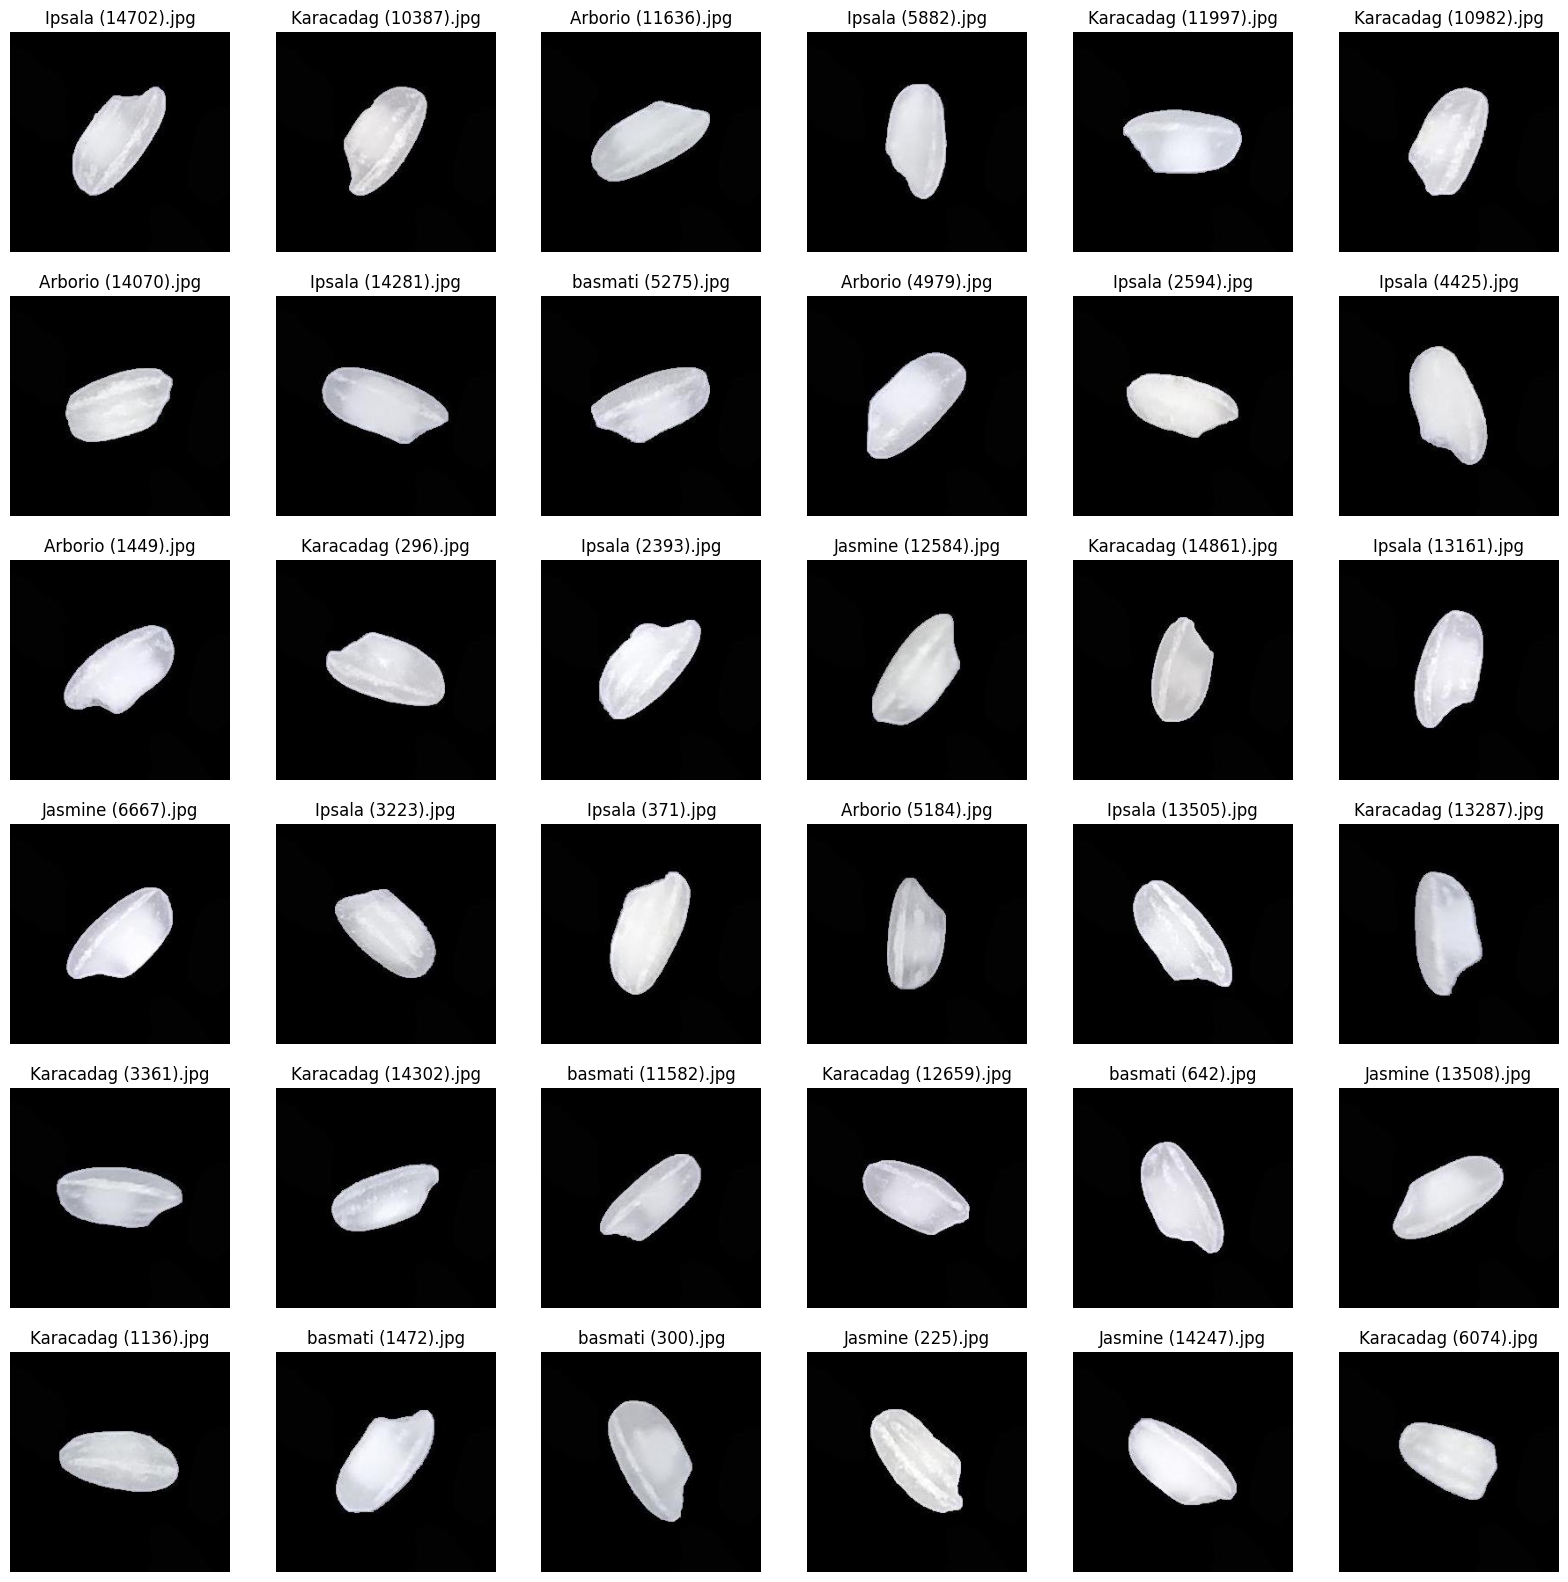

In [ ]:
#randomly select the image from the training set and check them
from PIL import Image
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(train_df),36))) :
    plt.subplot(6,6,n+1)
    image = Image.open(train_df['file_directory'][n+1])
    plt.imshow(image)
    plt.axis('off')
    plt.title(train_df["images"][i])

In [ ]:
#load the data using ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Instantiate ImageDataGenerator class
train_datagen = ImageDataGenerator(rescale=1./255)



# Configure train data generator

train_gen=train_datagen.flow_from_dataframe(
    train_df,                                   # Pandas dataframe containing the filepaths relative to directory (or absolute paths if directory is None) of the images in a string column.
           # string, path to the directory to read images from. If None, data in x_col column should be absolute paths.
    x_col="file_directory",                         # string, column in dataframe that contains the filenames (or absolute paths if directory is None).
    y_col="classes",                             # string or list, column/s in dataframe that has the target data.
    target_size=(28,28),                        # tuple of integers (height, width), default: (256, 256). The dimensions to which all images found will be resized.
    color_mode="rgb",                           # one of "grayscale", "rgb", "rgba". Default: "rgb". Whether the images will be converted to have 1 or 3 color channels.
    #we have not output now, we don't have any classification, we use input here
    class_mode="categorical",                         # one of "binary", "categorical", "input", "multi_output", "raw", sparse" or None. Default: "categorical".
    batch_size=32,                              # size of the batches of data (default: 32).
    shuffle=True)


# Configure validation data generator
val_datagen = ImageDataGenerator(rescale=1./255)
val_gen=val_datagen.flow_from_dataframe(
    validation_df,
        # string, path to the directory to read images from. If None, data in x_col column should be absolute paths.
    x_col="file_directory",                         # string, column in dataframe that contains the filenames (or absolute paths if directory is None).
    y_col="classes",
    target_size=(28,28),
    color_mode="rgb",
    class_mode="categorical",
    batch_size = 32,
    shuffle = True
    )

# Configure test data generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_gen=test_datagen.flow_from_dataframe(
    test_df,
         # string, path to the directory to read images from. If None, data in x_col column should be absolute paths.
    x_col="file_directory",                         # string, column in dataframe that contains the filenames (or absolute paths if directory is None).
    y_col="classes",
    target_size=(28,28),
    color_mode="rgb",
    class_mode="categorical",
    batch_size = 32,
    shuffle = True
    )

Found 60000 validated image filenames belonging to 5 classes.
Found 7500 validated image filenames belonging to 5 classes.
Found 7500 validated image filenames belonging to 5 classes.


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Build the Different CNN Models

**Basic CNN model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping, Callback
from tensorflow.keras import regularizers
# Build sequential model
model=Sequential()
#we use 3x3 dimeion filter and 128 filters
model.add(Conv2D(32, 3,input_shape=(28,28,3),activation="relu"))
model.add(MaxPooling2D(2))
model.add(Conv2D(64,kernel_size=(5,5),activation='relu'))
model.add(MaxPooling2D(2))

model.add(Flatten())
model.add(Dense(40,activation="relu"))                                                     # Add Dropout layer, randomly drops 50% neurons from propagation.
model.add(Dense(5,activation="softmax"))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 40)                4

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['acc'])

# Configure EarlyStopping object
#Es=EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)      # EarlyStopping with patience 2: if in 2 consecutive epochs, the validation loss didn't hit the record, training will stop.

# Fit the model and record the training history for plotting purpose
history=model.fit(train_gen,
      steps_per_epoch=train_gen.n//train_gen.batch_size, #train_gen.n//train_gen.batch_size. In lab 2, we set "batchsize" in model.fit() to determine the step length for steps in one epoch.
                  #Steps_per_epoch is the number of steps in one epoch. It can also determine the step length (batchszie) in each epoch. So, we can set steps_per_epoch instead to replace "batchsize".
                  #Either batchsize or steps_per_epoch is fine. Just make sure you set one of them.
      epochs=10,
      validation_data=val_gen,
      validation_steps=val_gen.n//val_gen.batch_size, #val_gen.n//val_gen.batch_size
      #callbacks=[Es]
      )

Epoch 1/10
1875/1875 [==============================] - 108s 51ms/step - loss: 0.1475 - acc: 0.9460 - val_loss: 0.0675 - val_acc: 0.9756
Epoch 2/10
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0678 - acc: 0.9765 - val_loss: 0.0487 - val_acc: 0.9821
Epoch 3/10
1875/1875 [==============================] - 91s 49ms/step - loss: 0.0541 - acc: 0.9817 - val_loss: 0.0355 - val_acc: 0.9864
Epoch 4/10
1875/1875 [==============================] - 92s 49ms/step - loss: 0.0411 - acc: 0.9859 - val_loss: 0.0305 - val_acc: 0.9892
Epoch 5/10
1875/1875 [==============================] - 97s 52ms/step - loss: 0.0350 - acc: 0.9880 - val_loss: 0.0275 - val_acc: 0.9905
Epoch 6/10
1875/1875 [==============================] - 93s 50ms/step - loss: 0.0294 - acc: 0.9900 - val_loss: 0.0577 - val_acc: 0.9773
Epoch 7/10
1875/1875 [==============================] - 91s 48ms/step - loss: 0.0268 - acc: 0.9909 - val_loss: 0.0244 - val_acc: 0.9923
Epoch 8/10
1875/1875 [=========================

In [ ]:
# Evaluate the model on the test data
scores_train = model.evaluate(train_gen)
scores_val = model.evaluate(val_gen)
scores_test = model.evaluate(test_gen)
print("Training Accuracy:", scores_train[1])
print("Validation Accuracy:", scores_val[1])
print("Test Accuracy:", scores_test[1])

235/235 [==============================] - 10s 41ms/step - loss: 0.0377 - acc: 0.9900
Training Accuracy: 0.9941166639328003
Validation Accuracy: 0.9901333451271057
Test Accuracy: 0.9900000095367432


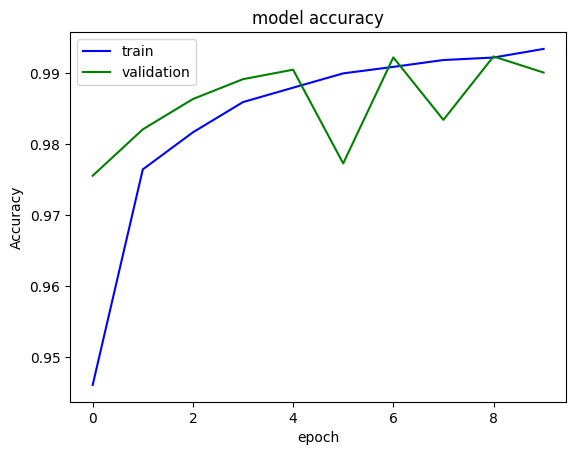

In [ ]:
# Plot history
import matplotlib.pyplot as plt
plt.plot(history.history['acc'], color='b')
plt.plot(history.history['val_acc'], color='g')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.title('model accuracy')
plt.legend(['train', 'validation'])
plt.show()

**ADvanced CNN: Add some layers and increase complexity**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping, Callback
from tensorflow.keras import regularizers
# Build sequential model
Advanced_CNN_model=Sequential()
#we use 3x3 dimeion filter and 128 filters
Advanced_CNN_model.add(Conv2D(64, 3,input_shape=(28,28,3),activation="relu"))
Advanced_CNN_model.add(MaxPooling2D(2))
Advanced_CNN_model.add(Conv2D(64,kernel_size=(5,5),activation='relu'))
Advanced_CNN_model.add(Conv2D(32,kernel_size=(5,5),activation='relu'))
Advanced_CNN_model.add(MaxPooling2D(2))

Advanced_CNN_model.add(Flatten())
Advanced_CNN_model.add(Dropout(0.5))                                                         # Add Dropout layer, randomly drops 50% neurons from propagation.
Advanced_CNN_model.add(Dense(40,activation="relu", kernel_regularizer=regularizers.l1(0.0005)))
Advanced_CNN_model.add(Dense(16,activation="relu",kernel_regularizer=regularizers.l1(0.0005)))
Advanced_CNN_model.add(Dense(5,activation="softmax"))

Advanced_CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          102464    
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 32)          51232     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 128)               0

In [ ]:
Advanced_CNN_model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['acc'])

# Configure EarlyStopping object
#Es=EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)      # EarlyStopping with patience 2: if in 2 consecutive epochs, the validation loss didn't hit the record, training will stop.

# Fit the model and record the training history for plotting purpose
Advanced_CNN_history=Advanced_CNN_model.fit(train_gen,
      steps_per_epoch=train_gen.n//train_gen.batch_size, #train_gen.n//train_gen.batch_size. In lab 2, we set "batchsize" in model.fit() to determine the step length for steps in one epoch.
                  #Steps_per_epoch is the number of steps in one epoch. It can also determine the step length (batchszie) in each epoch. So, we can set steps_per_epoch instead to replace "batchsize".
                  #Either batchsize or steps_per_epoch is fine. Just make sure you set one of them.
      epochs=15,
      validation_data=val_gen,
      validation_steps=val_gen.n//val_gen.batch_size #val_gen.n//val_gen.batch_size
      #callbacks=[Es]
      )

Epoch 1/15
1875/1875 [==============================] - 311s 163ms/step - loss: 0.4234 - acc: 0.8839 - val_loss: 0.1890 - val_acc: 0.9650
Epoch 2/15
1875/1875 [==============================] - 282s 150ms/step - loss: 0.2038 - acc: 0.9574 - val_loss: 0.1119 - val_acc: 0.9846
Epoch 3/15
1875/1875 [==============================] - 286s 153ms/step - loss: 0.1470 - acc: 0.9702 - val_loss: 0.0882 - val_acc: 0.9874
Epoch 4/15
1875/1875 [==============================] - 289s 154ms/step - loss: 0.1214 - acc: 0.9750 - val_loss: 0.1214 - val_acc: 0.9746
Epoch 5/15
1875/1875 [==============================] - 289s 154ms/step - loss: 0.1017 - acc: 0.9792 - val_loss: 0.0803 - val_acc: 0.9841
Epoch 6/15
1875/1875 [==============================] - 287s 153ms/step - loss: 0.0888 - acc: 0.9815 - val_loss: 0.0762 - val_acc: 0.9830
Epoch 7/15
1875/1875 [==============================] - 288s 154ms/step - loss: 0.0789 - acc: 0.9826 - val_loss: 0.0584 - val_acc: 0.9888
Epoch 8/15
1875/1875 [============

In [ ]:
# Evaluate the model on the test data
scores_train = Advanced_CNN_model.evaluate(train_gen)
scores_val = Advanced_CNN_model.evaluate(val_gen)
scores_test = Advanced_CNN_model.evaluate(test_gen)
print("Training Accuracy:", scores_train[1])
print("Validation Accuracy:", scores_val[1])
print("Test Accuracy:", scores_test[1])

235/235 [==============================] - 18s 76ms/step - loss: 0.0576 - acc: 0.9869
Training Accuracy: 0.9904999732971191
Validation Accuracy: 0.98826664686203
Test Accuracy: 0.9869333505630493


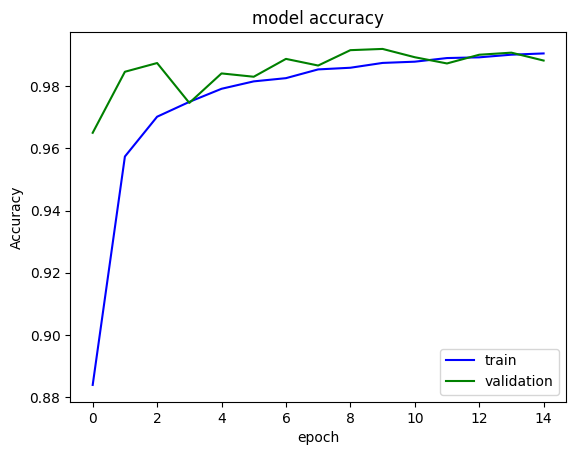

In [ ]:
# Plot history

plt.plot(Advanced_CNN_history.history['acc'], color='b')
plt.plot(Advanced_CNN_history.history['val_acc'], color='g')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.title('model accuracy')
plt.legend(['train', 'validation'])
plt.show()

#Apply Pretrained Model

**ResNet50**

In [ ]:
from tensorflow.keras.applications import ResNet50
import keras

In [ ]:
# Load pre-trained model
base_model = ResNet50(
    weights="imagenet",
    input_shape=(224, 224, 3),
    include_top=False,
)

# Freeze the base_model
base_model.trainable = False

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
inputs = keras.Input(shape=(28, 28, 3))
x = base_model(inputs, training=False)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(32, activation='relu')(x)
outputs = keras.layers.Dense(5, activation='softmax')(x)

ResNet50_model = keras.Model(inputs, outputs)
ResNet50_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 32)                65568     
                                                                 
 dense_4 (Dense)             (None, 5)                 165       
                                                                 
Total params: 23,653,445
Trainable params: 65,733
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
!pip install shap

import json
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 8.9 MB/s eta 0:00:00


102967424/102967424 [==============================] - 1s 0us/step


  0%|          | 0/98 [00:00<?, ?it/s]

Partition explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

Partition explainer: 3it [01:13, 36.56s/it]


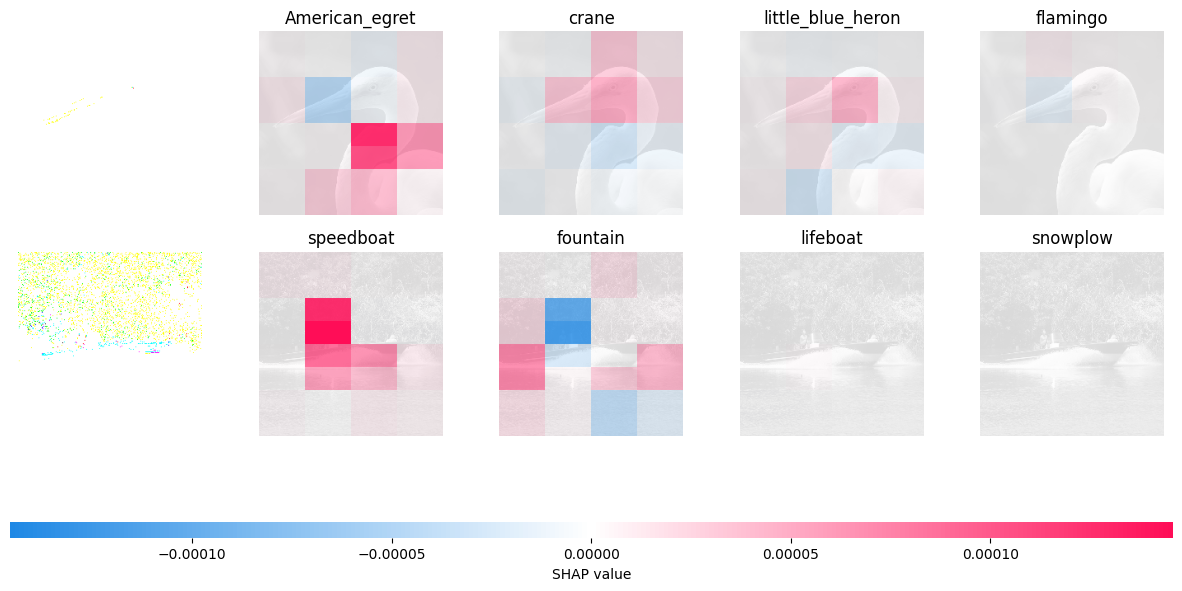

In [ ]:
model = ResNet50(weights='imagenet')
X, y = shap.datasets.imagenet50()
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
with open(shap.datasets.cache(url)) as file:
    class_names = [v[1] for v in json.load(file).values()]
# python function to get model output; replace this function with your own model function.
def f(x):
    tmp = x.copy()
    preprocess_input(tmp)
    return model(tmp)

# define a masker that is used to mask out partitions of the input image.
masker = shap.maskers.Image("inpaint_telea", X[0].shape)

# create an explainer with model and image masker
explainer = shap.Explainer(f, masker, output_names=class_names)

# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values = explainer(X[1:3], max_evals=100, batch_size=50, outputs=shap.Explanation.argsort.flip[:4])
shap.image_plot(shap_values)

In [ ]:
ResNet50_model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)
ResNet50_result = ResNet50_model.fit(train_gen,
      steps_per_epoch=train_gen.n//train_gen.batch_size, #train_gen.n//train_gen.batch_size. In lab 2, we set "batchsize" in model.fit() to determine the step length for steps in one epoch.
                  #Steps_per_epoch is the number of steps in one epoch. It can also determine the step length (batchszie) in each epoch. So, we can set steps_per_epoch instead to replace "batchsize".
                  #Either batchsize or steps_per_epoch is fine. Just make sure you set one of them.
      epochs=15,
      validation_data=val_gen,
      validation_steps=val_gen.n//val_gen.batch_size)

Epoch 1/15
1875/1875 [==============================] - 516s 270ms/step - loss: 0.4312 - accuracy: 0.8511 - val_loss: 0.2287 - val_accuracy: 0.9237
Epoch 2/15
1875/1875 [==============================] - 411s 219ms/step - loss: 0.2144 - accuracy: 0.9225 - val_loss: 0.1607 - val_accuracy: 0.9415
Epoch 3/15
1875/1875 [==============================] - 450s 240ms/step - loss: 0.1860 - accuracy: 0.9322 - val_loss: 0.1568 - val_accuracy: 0.9431
Epoch 4/15
1875/1875 [==============================] - 446s 238ms/step - loss: 0.1693 - accuracy: 0.9384 - val_loss: 0.1330 - val_accuracy: 0.9518
Epoch 5/15
1875/1875 [==============================] - 436s 233ms/step - loss: 0.1575 - accuracy: 0.9433 - val_loss: 0.1773 - val_accuracy: 0.9304
Epoch 6/15
1875/1875 [==============================] - 410s 219ms/step - loss: 0.1524 - accuracy: 0.9455 - val_loss: 0.1270 - val_accuracy: 0.9559
Epoch 7/15
1875/1875 [==============================] - 453s 241ms/step - loss: 0.1458 - accuracy: 0.9481 - val_

In [ ]:
# Evaluate the model on the test data
scores_train = ResNet50_model.evaluate(train_gen)
scores_val = ResNet50_model.evaluate(val_gen)
scores_test = ResNet50_model.evaluate(test_gen)
print("Training Accuracy:", scores_train[1])
print("Validation Accuracy:", scores_val[1])
print("Test Accuracy:", scores_test[1])
#ResNet50_model.evaluate(test_gen)

235/235 [==============================] - 47s 201ms/step - loss: 0.1132 - accuracy: 0.9625
Training Accuracy: 0.9559333324432373
Validation Accuracy: 0.9643999934196472
Test Accuracy: 0.9625333547592163


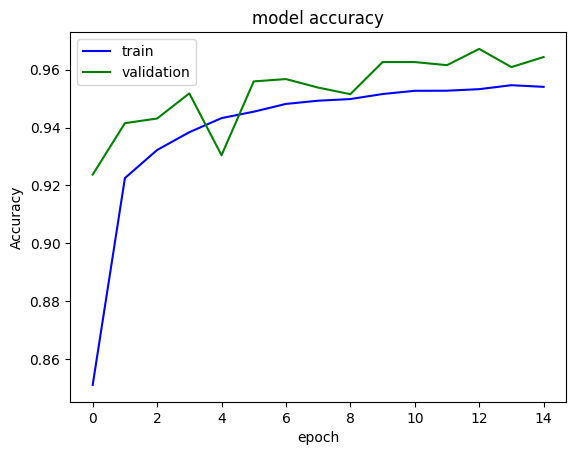

In [ ]:
plt.plot(ResNet50_result.history['accuracy'], color='b')
plt.plot(ResNet50_result.history['val_accuracy'], color='g')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.title('model accuracy')
plt.legend(['train', 'validation'])
plt.show()

**USE VGG16 Model**

In [ ]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
#Extract features and data preprocessing
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
base_dir = '/content/Rice_Image_Dataset'

train_dir = os.path.join(base_dir, 'train')
##validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20
def extract_features(directory, sample_count, num_classes):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count, num_classes))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)

        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

num_classes = 5

train_features, train_labels = extract_features(train_dir, 1840, num_classes)
#validation_features, validation_labels = extract_features(validation_dir, 460, num_classes)
test_features, test_labels = extract_features(test_dir, 1000, num_classes)

Found 60000 images belonging to 5 classes.
1/1 [==============================] - 0s 25ms/step
Found 15000 images belonging to 5 classes.
1/1 [==============================] - 0s 34ms/step


In [ ]:
train_features = np.reshape(train_features, (1840, 4 * 4 * 512))
#validation_features = np.reshape(validation_features, (460, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [ ]:
#build the model
from keras import models
from keras import layers
from keras import optimizers

VGG16_model = models.Sequential()
#we use other model and we use
#less dimension

VGG16_model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
VGG16_model.add(layers.Dropout(0.5))
VGG16_model.add(layers.Dense(32,activation="relu"))
VGG16_model.add(layers.Dense(16,activation="relu"))
VGG16_model.add(layers.Dense(5, activation='sigmoid'))
#2e-5
VGG16_model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['acc'])

VGG16_history = VGG16_model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(test_features, test_labels))




/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/30
92/92 [==============================] - 2s 8ms/step - loss: 1.0888 - acc: 0.5679 - val_loss: 0.4654 - val_acc: 0.8410
Epoch 2/30
92/92 [==============================] - 0s 5ms/step - loss: 0.3992 - acc: 0.8543 - val_loss: 0.1273 - val_acc: 0.9690
Epoch 3/30
92/92 [==============================] - 0s 5ms/step - loss: 0.2560 - acc: 0.9016 - val_loss: 0.1117 - val_acc: 0.9630
Epoch 4/30
92/92 [==============================] - 0s 5ms/step - loss: 0.1907 - acc: 0.9293 - val_loss: 0.0726 - val_acc: 0.9780
Epoch 5/30
92/92 [==============================] - 0s 5ms/step - loss: 0.1690 - acc: 0.9484 - val_loss: 0.0649 - val_acc: 0.9820
Epoch 6/30
92/92 [==============================] - 0s 5ms/step - loss: 0.1405 - acc: 0.9533 - val_loss: 0.0514 - val_acc: 0.9860
Epoch 7/30
92/92 [==============================] - 0s 5ms/step - loss: 0.1365 - acc: 0.9571 - val_loss: 0.0379 - val_acc: 0.9860
Epoch 8/30
92/92 [==============================] - 0s 5ms/step - loss: 0.1442 - acc: 0.95

In [ ]:
VGG16_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 32)                8224      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 5)                 85        
                                                                 
Total params: 2,106,245
Trainable params: 2,106,245
Non-trainable params: 0
_________________________________________________________________


In [ ]:
VGG16_model.evaluate(x=test_features,y=test_labels)
VGG16_model.evaluate(x=train_features,y=train_labels)
# Evaluate the model on the test data
#scores_train = VGG16_model.evaluate(train_features)
##scores_test = VGG16_model.evaluate(test_features)
#print("Training Accuracy:", scores_train[1])
#print("Test Accuracy:", scores_test[1])


58/58 [==============================] - 0s 3ms/step - loss: 0.0073 - acc: 0.9978


[0.0072827148251235485, 0.997826099395752]

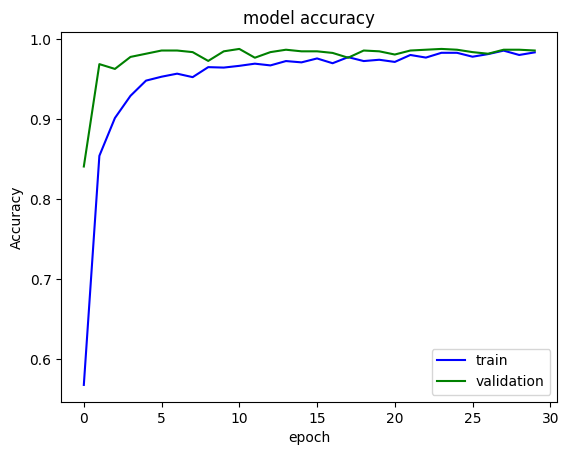

In [ ]:
import matplotlib.pyplot as plt

plt.plot(VGG16_history.history['acc'], color='b')
plt.plot(VGG16_history.history['val_acc'], color='g')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.title('model accuracy')
plt.legend(['train', 'validation'])
plt.show()